<a href="https://colab.research.google.com/github/dsnnaveen/global-terrorism-analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 
import subprocess
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
terror_df = pd.read_csv('/content/drive/MyDrive/capstone project/eda/ Global Terrorism Data.csv',encoding='ISO-8859-1')
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
terror_df=terror_df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror_df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
terror_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [9]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

#Destrucive Features

In [10]:
print("Country with the most attacks:",terror_df['Country'].value_counts().idxmax())
print("City with the most attacks:",terror_df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror_df['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror_df['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror_df['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror_df['Group'].value_counts().index[1])
print("Most Attack Types:",terror_df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


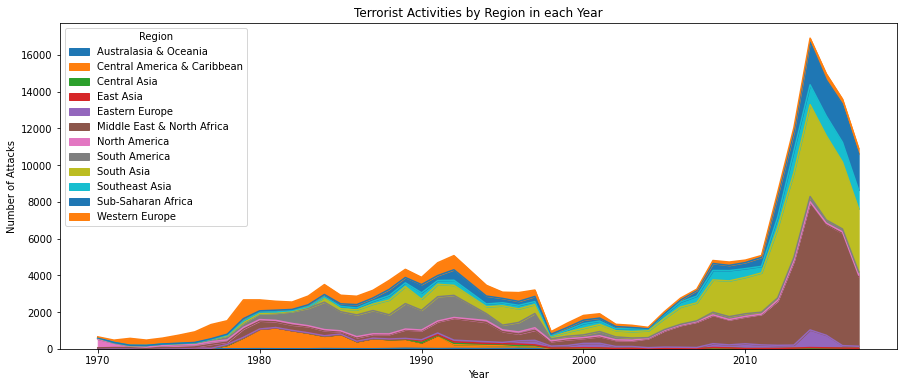

In [11]:
pd.crosstab(terror_df.Year, terror_df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


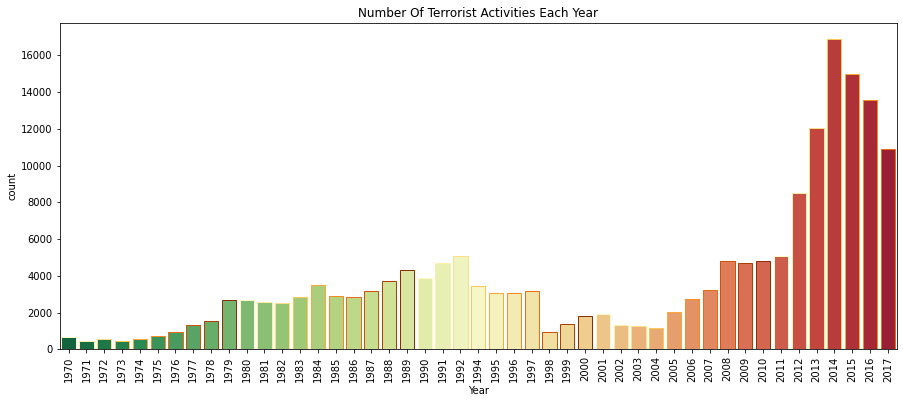

In [12]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_df,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

#History of the Worst Terror Attacks in Heatmap using ploty

In [13]:
terror_df['Wounded'] = terror_df['Wounded'].fillna(0).astype(int)
terror_df['Killed'] = terror_df['Killed'].fillna(0).astype(int)
terror_df['casualities'] = terror_df['Killed'] + terror_df['Wounded']

## **Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize**


In [14]:
terror_df1 = terror_df.sort_values(by='casualities',ascending=False)[:40]

In [15]:
heat=terror_df1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [16]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [17]:
terror_df.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

# **Top Countries affected by Terror Attacks**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



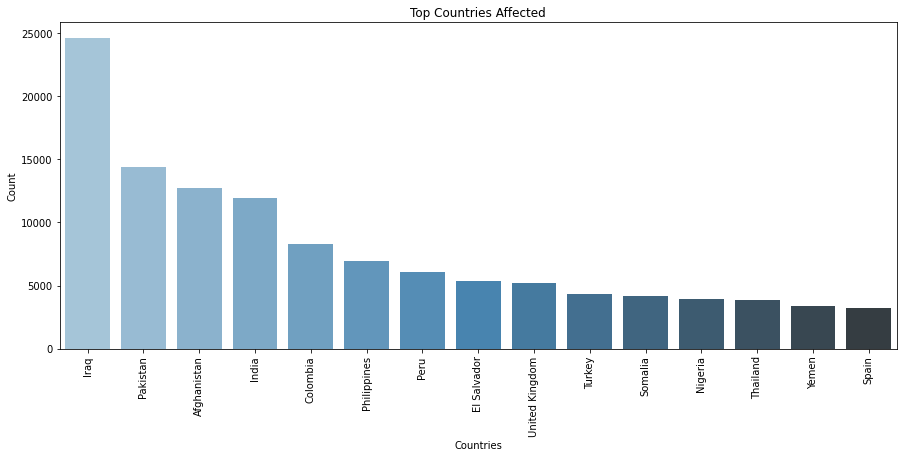

In [18]:
plt.subplots(figsize=(15,6))
sns.barplot(terror_df['Country'].value_counts()[:15].index,terror_df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# **The Big Four**
## **Now to visualize the top four countries that have suffered the most using bubble charts in Plotly**

In [19]:
terror_bubble_df = terror_df[(terror_df['Group'] != 'Unknown') & (terror_df['casualities'] > 50)]
terror_bubble_df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
1200,1972,3,4,United Kingdom,Northern Ireland,Western Europe,Belfast,54.607712,-5.956210,Bombing/Explosion,2,130,"Janet Bereen, 21 and Anne Owens, 22, Catholics",NaN,Irish Republican Army (IRA),Business,Explosives,NaN,132
1314,1972,5,30,Israel,Central,Middle East & North Africa,Lod,32.004361,34.888229,Bombing/Explosion,26,72,Aircraft Terminal,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,98
1789,1973,3,8,United Kingdom,England,Western Europe,London,51.504387,-0.140041,Bombing/Explosion,1,238,Court Building,NaN,Irish Republican Army (IRA),Government (General),Explosives,NaN,239
1972,1973,8,5,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,5,55,TWA Lounge,NaN,Black September,Airports & Aircraft,Firearms,NaN,60
2138,1973,12,17,Italy,Lazio,Western Europe,Rome,41.890961,12.490069,Hostage Taking (Barricade Incident),30,50,Pan Am Lounge and Loading Pan Am 707,NaN,Black September,Airports & Aircraft,Firearms,NaN,80


In [20]:
terror_bubble_df = terror_bubble_df.sort_values(['Region', 'Country'])

# **It is best to always check for null values and drop the features that are not needed. Atleast it can execute much faster.** 

In [21]:
terror_bubble_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
state             3
Region            0
city              1
latitude         62
longitude        62
AttackType        0
Killed            0
Wounded           0
Target            9
Summary         517
Group             0
Target_type       0
Weapon_type       0
Motive         1059
casualities       0
dtype: int64

In [22]:
terror_bubble_df = terror_bubble_df.drop(['latitude','longitude','Summary','Motive','Target'],axis=1)

In [23]:
terror_bubble_df = terror_bubble_df.dropna(subset=['city'])

In [24]:
terror_bubble_df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
state          3
Region         0
city           0
AttackType     0
Killed         0
Wounded        0
Group          0
Target_type    0
Weapon_type    0
casualities    0
dtype: int64

# **Iraq, Pakistan, Afghanistan and India have suffered the most number of terror attacks. So here I have used an Interactive Bubble chart to highlight their timeline with details like City, Terrorist Group, Number of Casualities and Year. And ofcourse, I have used the bubble size according to the casualities suffered** 

In [25]:
hover_text = []
for index, row in terror_bubble_df.iterrows():
    hover_text.append(('City: {city}<br>'+
                      'Group: {group}<br>'+
                      'casualities: {casualities}<br>'+
                      'Year: {year}').format(city=row['city'],
                                            group=row['Group'],
                                            casualities=row['casualities'],
                                            year=row['Year']))
terror_bubble_df['text'] = hover_text

In [26]:
trace0 = go.Scatter(
    x=terror_bubble_df['Year'][terror_bubble_df['Country'] == 'Iraq'],
    y=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Iraq'],
    mode='markers',
    name='Iraq',
    text=terror_bubble_df['text'][terror_bubble_df['Country'] == 'Iraq'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Iraq'],
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=terror_bubble_df['Year'][terror_bubble_df['Country'] == 'Pakistan'],
    y=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Pakistan'],
    mode='markers',
    name='Pakistan',
    text=terror_bubble_df['text'][terror_bubble_df['Country'] == 'Pakistan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Pakistan'],
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=terror_bubble_df['Year'][terror_bubble_df['Country'] == 'Afghanistan'],
    y=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Afghanistan'],
    mode='markers',
    name='Afghanistan',
    text=terror_bubble_df['text'][terror_bubble_df['Country'] == 'Afghanistan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Afghanistan'],
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=terror_bubble_df['Year'][terror_bubble_df['Country'] == 'India'],
    y=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'India'],
    mode='markers',
    name='India',
    text=terror_bubble_df['text'][terror_bubble_df['Country'] == 'India'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'India'],
        line=dict(
            width=2
        ),
    )
)

In [27]:
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
         title = 'The Big Four',
         xaxis = dict(
             title = 'Year',
             #type = 'log',
             range = [1976,2016],
             tickmode = 'auto',
             nticks = 30,
             showline = True,
             showgrid = False
             ),
         yaxis = dict(
             title = 'Casualities',
             type = 'log',
             range = [1.8,3.6],
             tickmode = 'auto',
             nticks = 40,
             showline = True,
             showgrid = False),
         paper_bgcolor='rgb(243, 243, 243)',
         plot_bgcolor='rgb(243, 243, 243)',
         )

In [28]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Terrorism Bubble')

# **Now let us check out which terrorist organizations have carried out their operations in each country. A value count would give us the terrorist organizations that have carried out the most attacks. we have indexed from 1 as to negate the value of 'Unknown'** 


In [30]:
terror_df.Group.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

In [31]:
test = terror_df[terror_df.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [32]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

# **Now let us plot the presence of these terrorist organizations on a world map using Folium. Through this, we would be able to know the organizations that have carried out their operations on some of the countries**

In [34]:
import folium
from folium.plugins import MarkerCluster

In [35]:
terror_df_group = terror_df.dropna(subset=['latitude','longitude'])

## **It makes sense now to have only unique rows of Country and Group as multiple groups  can operate on a single Country. But it is highly unlikely in most of the countries. But still there are exceptions.** 

In [36]:
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group'])

## **We now use only the top 8 mterrorist organizations sorted based on the number of attacks worldwide for the sake of rendering.** 

In [37]:
terrorist_groups = terror_df.Group.value_counts()[1:8].index.tolist()

In [38]:
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terrorist_groups)]

In [39]:
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'], 
                  terror_df_group.iloc[i]['Country'])).add_to(m)
 # Save it as html
m.save('Terrorist_Organizations_in_Country.html')

In [40]:
m